<a href="https://colab.research.google.com/github/abdullahkhafabi-010/PCVK/blob/main/WEEK9/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 9 – Morfologi (Erosi, Dilasi, Opening, Closing, Transformasi Top-hat dan Bottom-hat, Skeleton, Thickening)


TUGAS PRAKTIKUM

import folder yang ada di Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import library yang akan digunakan

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV

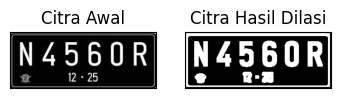

In [6]:
#Dilasi tanpa library
def dilasi_citra(F,w):
  #size image
  # p : widith
  # q : height
  # F : untuk mengetahui lebar dan tinggi citra
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV

[[1 1 1]
 [1 1 1]
 [1 1 1]]


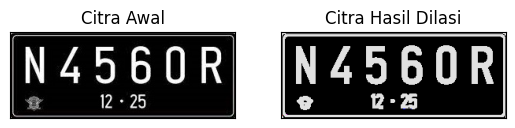

In [7]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg')
#img = cv2.imread('morp.jpg',0)

ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
print(kernel)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV

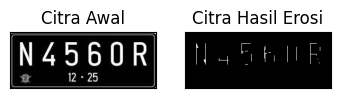

In [8]:
# Erosi Tanpa Library
def erosi_citra(F, k):
  # Size image
  m, n = F.shape

  # Generate structure element erosi (SE)
  SE = np.ones((k, k), dtype=np.uint8)
  constant = (k - 1) // 2
  imgE = np.zeros((m, n), dtype=np.uint8)

  # Proses Erosi
  for i in range(constant, m - constant):
      for j in range(constant, n - constant):
          temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
          product = temp * SE

          # mencari nilai terkecil dari array product
          imgE[i, j] = np.min(product)

  return imgE

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', 0)
ret1, thresh1 = cv2.threshold(img, 175, 225,cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()


Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV

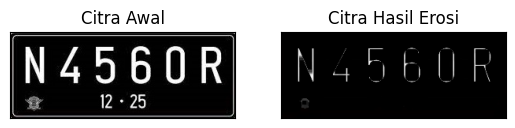

In [9]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg')
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV

Operasi Opening Menggunakan tanpa Library Morphology

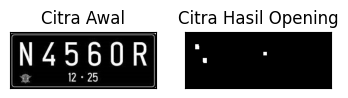

In [10]:
# opening : erosi - dilasi
# Erosi Tanpa Library
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', 0)
ret, thresho = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
k = 7
imgO = dilasi_citra(erosi_citra(thresho, k), k)

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgO, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

Operasi Opening Menggunakan Library Morphology

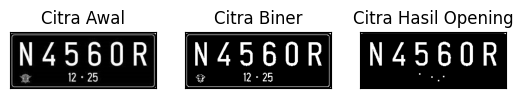

In [11]:
# Membaca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', 0)

# Melakukan thresholding pada citra
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Membuat kernel untuk operasi opening
kernel = np.ones((3, 3), np.uint8)

# Melakukan operasi opening
openn = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Menampilkan citra-citra dalam subplot
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(openn, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

operasi closing tanpa library morphology


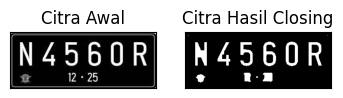

In [12]:
# closing : dilasi - erosi
# Erosi Tanpa Library
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', 0)

retc, threshc = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
k = 7
imgDilated = dilasi_citra(threshc, k)
imgClosed = erosi_citra(imgDilated, k)

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgClosed, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

operasi closing dengan library morphology

(Text(0.5, 1.0, 'Citra Hasil Closing'), ([], []), ([], []))

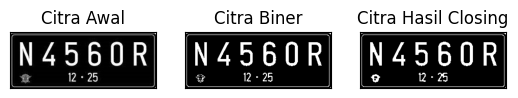

In [13]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', 0)

# Lakukan thresholding
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # Perubahan di sini

# Buat elemen kernel
kernel = np.ones((3, 3), np.uint8)

# Operasi Closing (penutupan)
closs = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Tampilkan citra-citra
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(closs, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5

SED = Cross 3


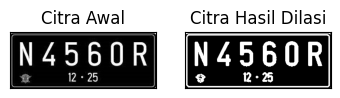

SED = Cross 5


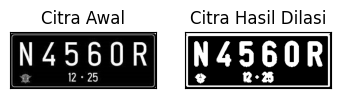

In [14]:
# Dilasi Cross SED nilai w tidak otomatis menjadi SED (kernel)
def dilasi_citra(F, w, SED):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)
    constant1 = (w - 1) // 2

    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

# SED = Cross 3
SED_3 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)

print('SED = Cross 3')

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', 0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
w = 3
imgD = dilasi_citra(thresh, w, SED_3)

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

# SED = Cross 5
SED_5 = np.array([[0, 0, 1, 0, 0],
                 [0, 0, 1, 0, 0],
                 [1, 1, 1, 1, 1],
                 [0, 0, 1, 0, 0],
                 [0, 0, 1, 0, 0]], dtype=np.uint8)

print('SED = Cross 5')

ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
w = 5
imgD = dilasi_citra(thresh, w, SED_5)

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5

SED = Circle 3


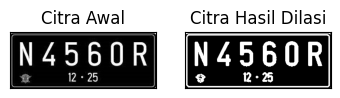

SED = Circle 5


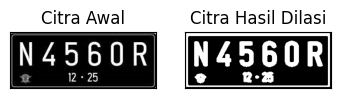

In [15]:
#Dilasi Circular SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Circle 3')
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', 0)
ret, thresh = cv2.threshold(img, 127, 225,
cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()
print('SED = Circle 5')

ret, thresh = cv2.threshold(img, 127, 225,
cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

 Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7

SE = Rectangle 3x5


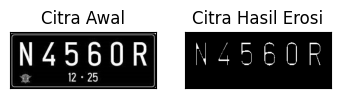

SE = Rectangle 5x7


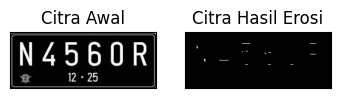

In [16]:
#Erosi Cross SE
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2

  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Rectangle 3x5')
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', 0)
ret1, thresh1 = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')

ret1, thresh1 = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5

SE = Line Vertikal 3


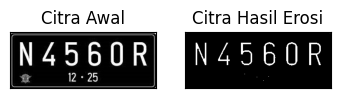

SE = Line Vertikal 5


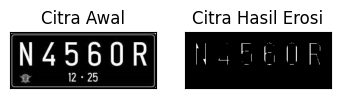

In [17]:
#Erosi Line Vertikal SE
def erosi_citra(F, k):
    # Size image
    m, n = F.shape

    # Generate structure element erosi (SE)
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (1, k))  # SE line vertikal
    constant = (k - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

print('SE = Line Vertikal 3')
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', 0)
ret1, thresh1 = cv2.threshold(img, 127, 225,
cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()
print('SE = Line Vertikal 5')

ret1, thresh1 = cv2.threshold(img, 127, 225,
cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

TopHat

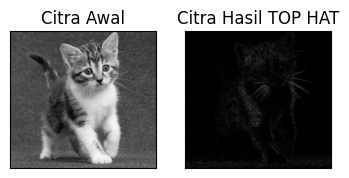

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Getting the kernel to be used in Top-Hat filter
kernel_size = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Reading the image named 'plat nomer.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# Plot the original image and the Top-Hat result
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(tophat_img, cmap='gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

BLACKHAT

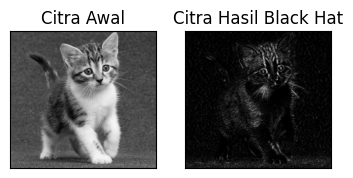

In [19]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Applying the Black-Hat operation
#tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

Skeleton

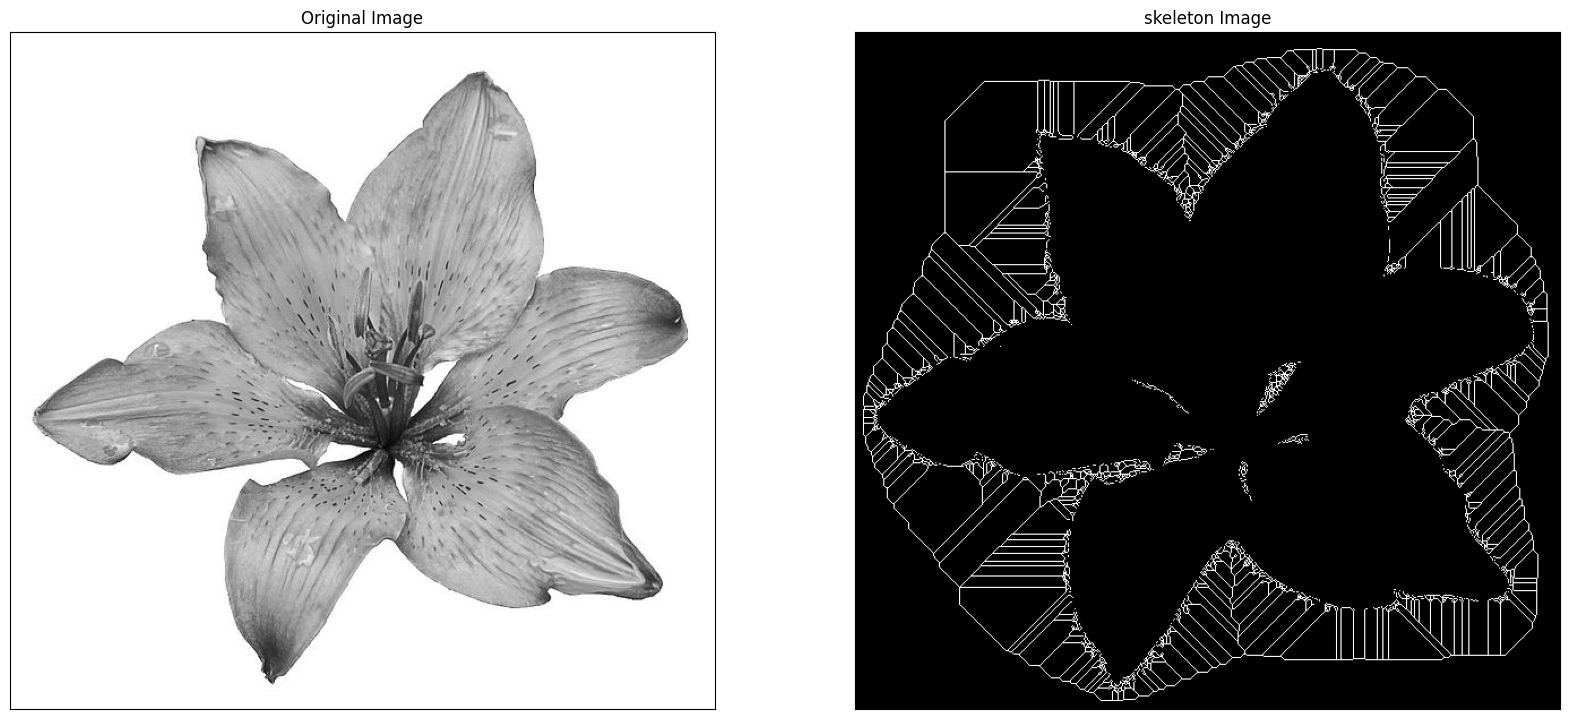

In [20]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize
# read image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg',0)
binary = img > filters.threshold_triangle(img)
# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0
# skeletonize image
skeleton = skeletonize(binary_cp)
# print images
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])
plt.savefig("binary and bin_skeleton.png")
plt.show()

Skeleton Inverse

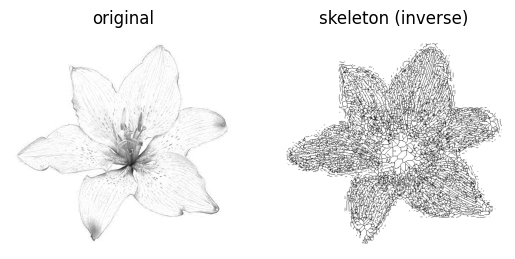

In [21]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize
# read image
img = io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')[...,0]
# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)
# skeletonize image
skeleton = skeletonize(binary)
# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()
# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

Thickening

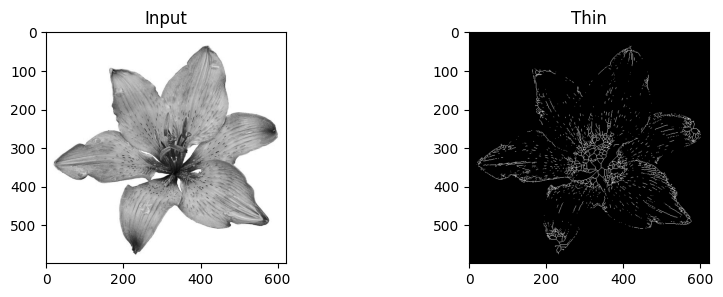

In [22]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.savefig('/tmp/char_out.png')
plt.show()

Tugas Praktikum

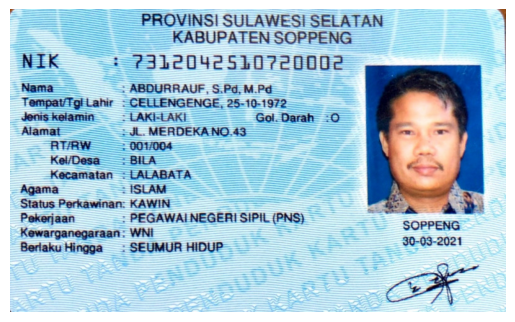

In [23]:
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
import os
import random

image = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
    # Tampilkan gambar
plt.figure()
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

<ipython-input-24-97dcfde24c71>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


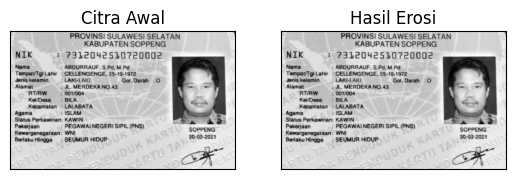

In [24]:
# Mengambil citra
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tentukan ukuran Structuring Element (SE) untuk Erosi (misalnya, square 3x3)
k = 1
SE = np.ones((k, k), np.uint8)

# Operasi Erosi
img_dilated = cv2.dilate(img, SE, iterations=1)
# Tampilkan hasil Erosi
plt.figure()
plt.axis('off')
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_dilated, cmap='gray')
plt.title('Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-25-556e968dbccd>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


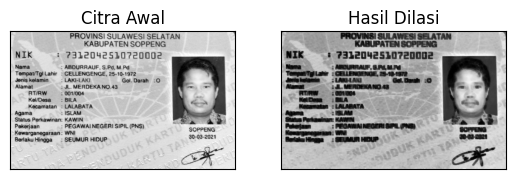

In [25]:
# Mengambil citra
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tentukan ukuran Structuring Element (SE) untuk Dilasi (misalnya, square 3x3)
k = 5
SE = np.ones((k, k), np.uint8)

# Operasi Dilasi
img_eroded = cv2.erode(img, SE, iterations=1)

# Tampilkan hasil Dilasi
plt.figure()
plt.axis('off')
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_eroded, cmap='gray')
plt.title('Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-26-4bc375ca388f>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


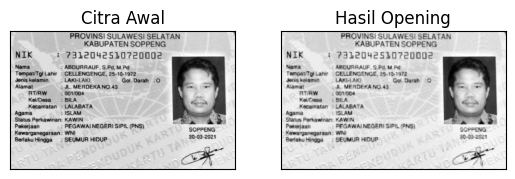

In [26]:
# Mengambil citra
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tentukan ukuran Structuring Element (SE) untuk Opening (misalnya, square 3x3)
k_Opening = 3
SE_Opening = np.ones((k_Opening, k_Opening), np.uint8)

# Operasi Opening
img_closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, SE_Opening)

# Tampilkan hasil Opening
plt.figure()
plt.axis('off')
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_closed, cmap='gray')
plt.title('Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-27-d7632eea764f>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


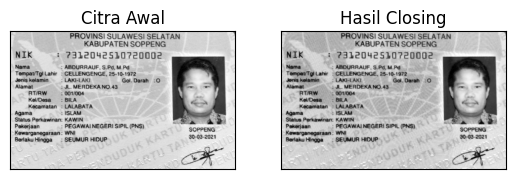

In [27]:
# Mengambil citra
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tentukan ukuran Structuring Element (SE) untuk Closing (misalnya, square 3x3)
k_Closing = 3
SE_Closing = np.ones((k_Closing, k_Closing), np.uint8)

# Operasi Closing
img_opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, SE_Closing)

# Tampilkan hasil Closing
plt.figure()
plt.axis('off')
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_opened, cmap='gray')
plt.title('Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()


<ipython-input-28-916dd92cd219>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


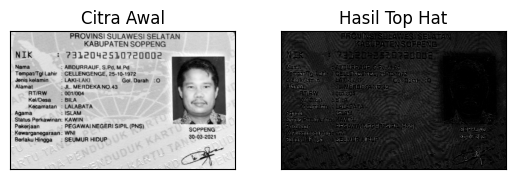

In [28]:
# Mengambil citra
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tentukan ukuran Structuring Element (SE) untuk Top Hat (misalnya, square 3x3)
k_tophat = 3
SE_tophat = np.ones((k_tophat, k_tophat), np.uint8)

# Operasi Top Hat
img_tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, SE_tophat)

# Tampilkan hasil Top Hat
plt.figure()
plt.axis('off')
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_tophat, cmap='gray')
plt.title('Hasil Top Hat'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-29-9bfc009c6cac>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


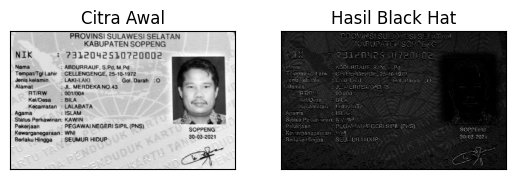

In [29]:
# Mengambil citra
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tentukan ukuran Structuring Element (SE) untuk Black Hat (misalnya, square 3x3)
k_blackhat = 3
SE_blackhat = np.ones((k_blackhat, k_blackhat), np.uint8)

# Operasi Black Hat
img_blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, SE_blackhat)

# Tampilkan hasil Black Hat
plt.figure()
plt.axis('off')
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_blackhat, cmap='gray')
plt.title('Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()
